In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# Viualization

In [ ]:
# check correlation among the others
corr=df.corr()
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


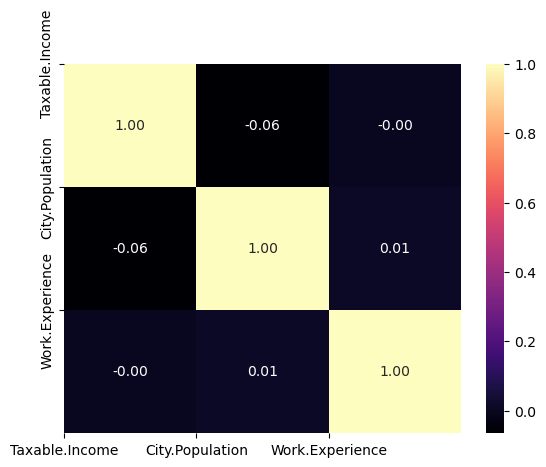

In [ ]:
# Generate heatmap
sns.heatmap(corr, cmap="magma", annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

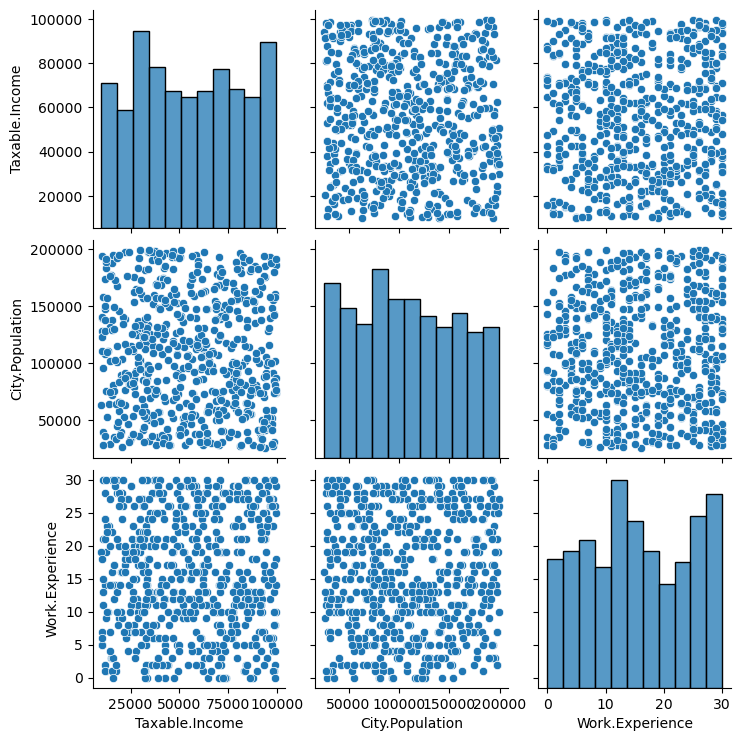

In [ ]:
# PAirwise plot for all features
sns.pairplot(df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


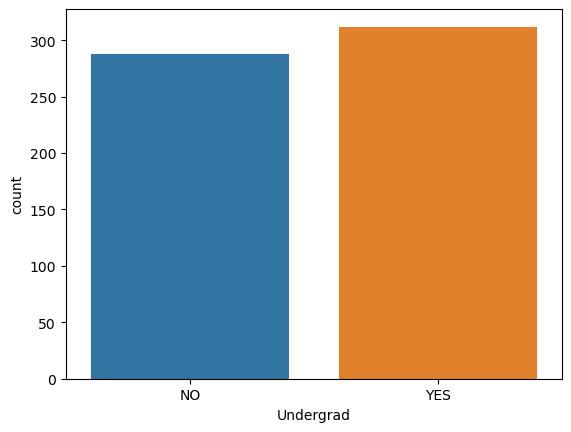

In [ ]:
# Checking countplot of categories for categorical columns
sns.countplot(df["Undergrad"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


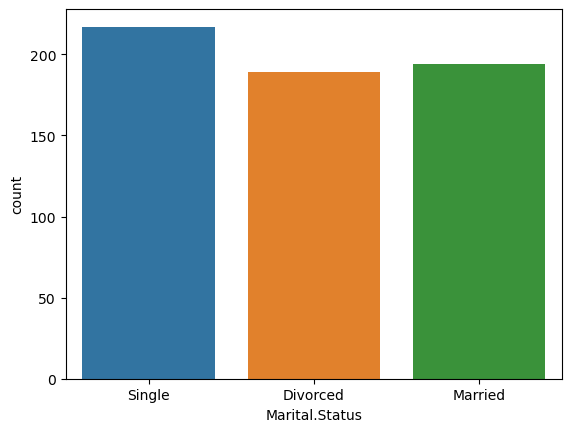

In [ ]:
sns.countplot(df["Marital.Status"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


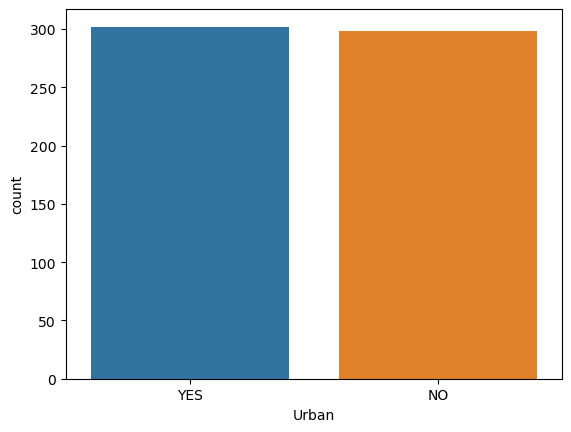

In [ ]:
sns.countplot(df["Urban"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


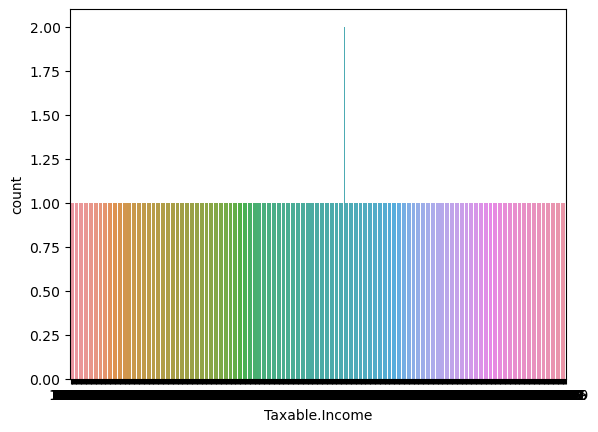

In [ ]:
sns.countplot(df["Taxable.Income"])
plt.show()

In [ ]:
# Encoding
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=["Undergrad","Marital.Status","Urban"])
df=encoder.fit_transform(df)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2


treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
tax =  []
for value in df["Taxable.Income"]:
    if value<=30000:
        tax.append("Risky")
    else:
        tax.append("Good")

df["tax"] = tax
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good


In [ ]:
# splitting the data into x and y
x = df.drop(["Taxable.Income","tax"],axis=1)
y = df["tax"]

In [ ]:
# Data partition
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=(40))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:", ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:", ac2.round(2))

training score: 0.82
test score: 0.76


In [ ]:
# Decision trees
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", max_depth=7)
model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:", ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:", ac2.round(2))

training score: 0.83
test score: 0.76


In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=model, n_estimators=140, max_samples=0.7, random_state=10, max_features=0.7)
bag.fit(x_train,y_train)
y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:", ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:", ac2.round(2))

training score: 0.8
test score: 0.77


In [ ]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=10, base_estimator=model, random_state=(25))
ada.fit(x_train,y_train)
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:", ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:", ac2.round(2))

training score: 1.0
test score: 0.71
